In [2]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
%autoreload 2

In [3]:
%matplotlib inline

In [4]:
import matplotlib.pylab as plt
from turnpt_analysis import get_df_turnpt_measures
import numpy as np
import pandas as pd

In [5]:
def get_nav(price, turnpts, dates_index, signal, title='NAV', plot=True):
    index_upward = np.where(turnpts==1)[0]
    index_downward = np.where(turnpts==-1)[0]
    
    ret = price.pct_change().shift(-1).fillna(0)# enter at close t, earn return of t+1 
    nav_strategy = (1 + ret * signal).cumprod()
    nav_buy_hold = (1 + ret).cumprod() 
    
    if plot:
        fig, ax1 = plt.subplots(figsize=(20, 5))
        ax1.plot(dates_index, nav_buy_hold, color='gray', markevery=index_upward.tolist(), marker='^', markerfacecolor='red', markeredgewidth=0.0)
        ax1.plot(dates_index, nav_buy_hold, color='gray', markevery=index_downward.tolist(), marker='v', markerfacecolor='green', markeredgewidth=0.0)
        ax1.plot(dates_index, nav_strategy, color='orange')
        plt.title(title)
    return nav_strategy


def get_signal_shift(df_data, yvar, shift):
    signal = (
        df_data.
        assign(signal=lambda x: x[yvar].shift(shift).fillna(0)).
        assign(signal = lambda x: np.where(x.signal == 0, np.nan, x.signal)).
        signal.fillna(method='pad').fillna(0)
    )
    return signal

dict_df_TP = {}
def get_df_TP(N):
    if N not in dict_df_TP.keys():
        df_TP = get_df_turnpt_measures(N).fillna(0).set_index('tx_datetime')
        dict_df_TP[N] = df_TP
    return dict_df_TP[N]


In [6]:
%%time
yvar = 'is_turnpt'
Ns = range(1, 7)
shifts = range(-6, 7)
dict_collector = {}
for N in Ns:
    print(f'N={N}')
    df_TP = get_df_TP(N)
    nav_last = []
    for shift in shifts:
        signal = get_signal_shift(df_TP, yvar, shift)
        nav = get_nav(df_TP.close, df_TP.is_turnpt, df_TP.index, signal, plot=False)
        nav_last.append(nav[-1])
    dict_collector.update({N: nav_last})

N=1
transformed OHLCV at frequency 1D
reading cache of TXF in 1D OHLCV
N=2
transformed OHLCV at frequency 1D
reading cache of TXF in 1D OHLCV
N=3
transformed OHLCV at frequency 1D
reading cache of TXF in 1D OHLCV


/home/cyyen/miniconda3/envs/stock_path_tracker/lib/python3.8/site-packages/pandas/core/groupby/groupby.py:980: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  result = concat(values, axis=self.axis, keys=keys)


N=4
transformed OHLCV at frequency 1D
reading cache of TXF in 1D OHLCV
N=5
transformed OHLCV at frequency 1D
reading cache of TXF in 1D OHLCV
N=6
transformed OHLCV at frequency 1D
reading cache of TXF in 1D OHLCV
CPU times: user 23.6 s, sys: 97.8 ms, total: 23.7 s
Wall time: 23.6 s


In [6]:
%%time
yvar = 'is_turnpt'
Ns = range(1, 7)
shifts = range(-6, 7)
dict_collector = {}
for N in Ns:
    print(f'N={N}')
    df_TP = get_df_TP(N)
    nav_last = []
    for shift in shifts:
        signal = get_signal_shift(df_TP, yvar, shift)
        nav = get_nav(df_TP.close, df_TP.is_turnpt, df_TP.index, signal, plot=False)
        nav_last.append(nav[-1])
    dict_collector.update({N: nav_last})

N=1
transformed OHLCV at frequency 1D
reading cache of TXF in 1D OHLCV
N=2
transformed OHLCV at frequency 1D
reading cache of TXF in 1D OHLCV
N=3
transformed OHLCV at frequency 1D
reading cache of TXF in 1D OHLCV


/home/cyyen/miniconda3/envs/stock_path_tracker/lib/python3.8/site-packages/pandas/core/groupby/groupby.py:980: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  result = concat(values, axis=self.axis, keys=keys)


N=4
transformed OHLCV at frequency 1D
reading cache of TXF in 1D OHLCV
N=5
transformed OHLCV at frequency 1D
reading cache of TXF in 1D OHLCV
N=6
transformed OHLCV at frequency 1D
reading cache of TXF in 1D OHLCV
CPU times: user 23.6 s, sys: 97.8 ms, total: 23.7 s
Wall time: 23.6 s


In [6]:
%%time
yvar = 'is_turnpt'
Ns = range(1, 7)
shifts = range(-6, 7)
dict_collector = {}
for N in Ns:
    print(f'N={N}')
    df_TP = get_df_TP(N)
    nav_last = []
    for shift in shifts:
        signal = get_signal_shift(df_TP, yvar, shift)
        nav = get_nav(df_TP.close, df_TP.is_turnpt, df_TP.index, signal, plot=False)
        nav_last.append(nav[-1])
    dict_collector.update({N: nav_last})

N=1
transformed OHLCV at frequency 1D
reading cache of TXF in 1D OHLCV
N=2
transformed OHLCV at frequency 1D
reading cache of TXF in 1D OHLCV
N=3
transformed OHLCV at frequency 1D
reading cache of TXF in 1D OHLCV


/home/cyyen/miniconda3/envs/stock_path_tracker/lib/python3.8/site-packages/pandas/core/groupby/groupby.py:980: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  result = concat(values, axis=self.axis, keys=keys)


N=4
transformed OHLCV at frequency 1D
reading cache of TXF in 1D OHLCV
N=5
transformed OHLCV at frequency 1D
reading cache of TXF in 1D OHLCV
N=6
transformed OHLCV at frequency 1D
reading cache of TXF in 1D OHLCV
CPU times: user 23.6 s, sys: 97.8 ms, total: 23.7 s
Wall time: 23.6 s


In [6]:
%%time
yvar = 'is_turnpt'
Ns = range(1, 7)
shifts = range(-6, 7)
dict_collector = {}
for N in Ns:
    print(f'N={N}')
    df_TP = get_df_TP(N)
    nav_last = []
    for shift in shifts:
        signal = get_signal_shift(df_TP, yvar, shift)
        nav = get_nav(df_TP.close, df_TP.is_turnpt, df_TP.index, signal, plot=False)
        nav_last.append(nav[-1])
    dict_collector.update({N: nav_last})

N=1
transformed OHLCV at frequency 1D
reading cache of TXF in 1D OHLCV
N=2
transformed OHLCV at frequency 1D
reading cache of TXF in 1D OHLCV
N=3
transformed OHLCV at frequency 1D
reading cache of TXF in 1D OHLCV


/home/cyyen/miniconda3/envs/stock_path_tracker/lib/python3.8/site-packages/pandas/core/groupby/groupby.py:980: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  result = concat(values, axis=self.axis, keys=keys)


N=4
transformed OHLCV at frequency 1D
reading cache of TXF in 1D OHLCV
N=5
transformed OHLCV at frequency 1D
reading cache of TXF in 1D OHLCV
N=6
transformed OHLCV at frequency 1D
reading cache of TXF in 1D OHLCV
CPU times: user 23.6 s, sys: 97.8 ms, total: 23.7 s
Wall time: 23.6 s


# 最佳 N 的選擇

In [7]:
df_nav = pd.DataFrame(dict_collector).T
df_nav.index = [f'N={N}' for N in Ns]
df_nav.columns = shifts
df_nav.style.highlight_max(color='lightgreen')

,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6
N=1,0.691302,1.10362,0.655936,1.30041,0.633529,0.382092,85681,0.576558,1.08971,1.30312,0.488715,0.486083,0.46905
N=2,0.409209,0.649044,0.38865,0.603322,0.513959,9.75067,11643.5,23.4045,1.04422,0.78142,0.616232,0.45169,0.36669
N=3,0.251323,0.337258,0.216239,0.347941,1.50655,16.549,3275.56,41.8272,3.19218,0.934387,0.666557,0.577898,0.478056
N=4,0.209321,0.287049,0.20988,0.56361,2.23486,20.0171,1960.47,48.3231,7.54256,1.97795,0.794824,0.495289,0.561748
N=5,0.157737,0.236928,0.288204,0.745821,2.32062,18.7848,935.081,45.954,10.04,3.18316,1.23804,0.733726,0.793753
N=6,0.113715,0.222473,0.323774,0.759488,2.43923,17.5503,622.24,38.8756,8.77999,2.7229,1.12882,0.7397,0.685799


# N == 5 

N=5


/home/cyyen/miniconda3/envs/stock_path_tracker/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


,-5,-4,-3,-2,-1,0,1,2,3,4,5
0,0.24,0.29,0.75,2.32,18.78,935.08,45.95,10.04,3.18,1.24,0.73


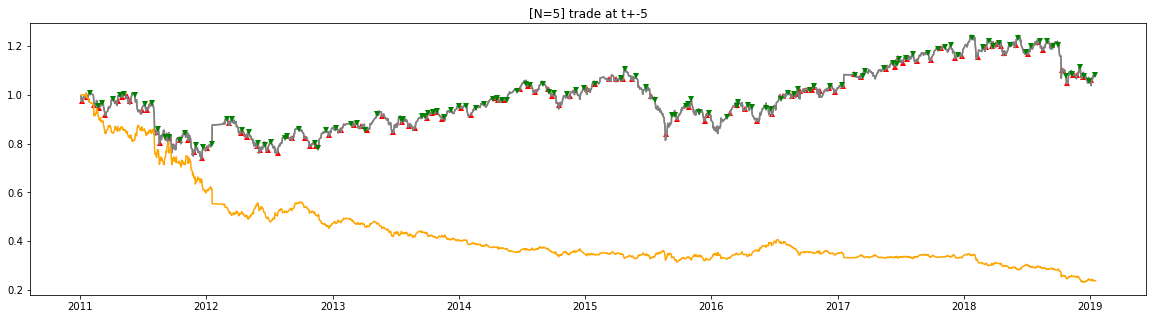

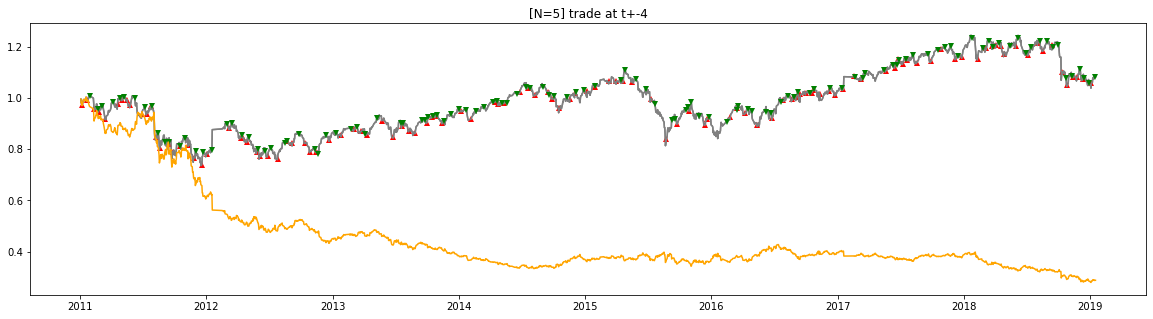

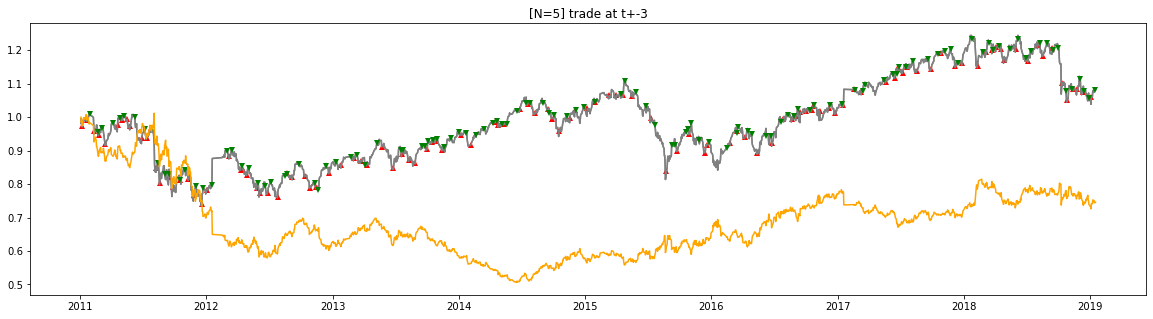

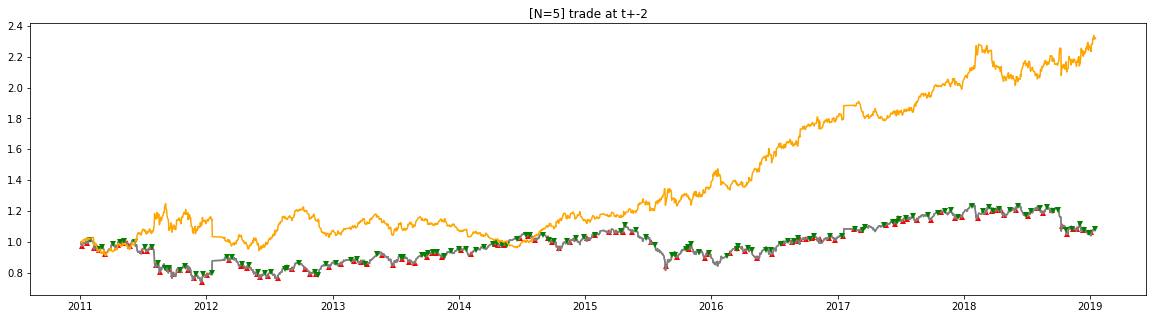

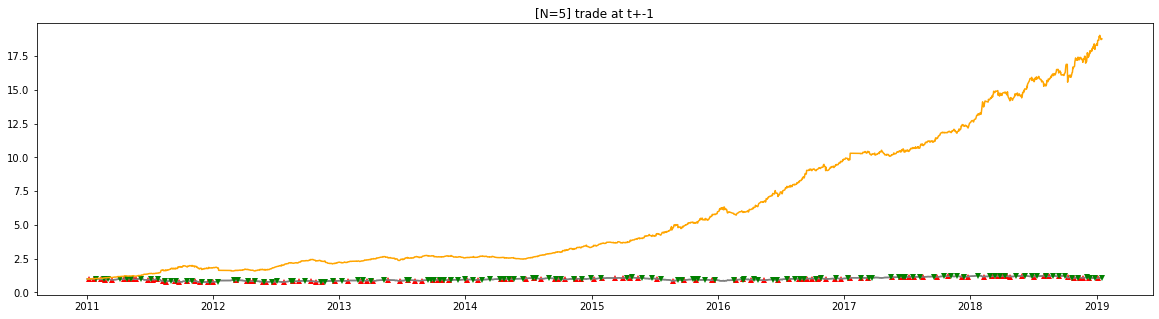

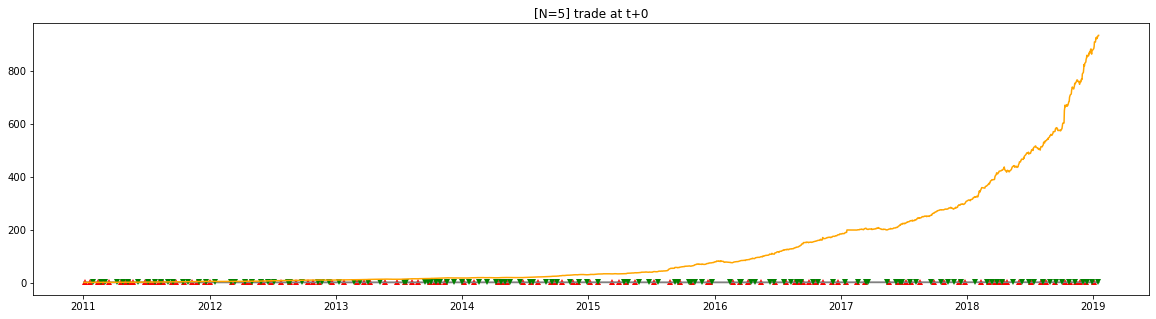

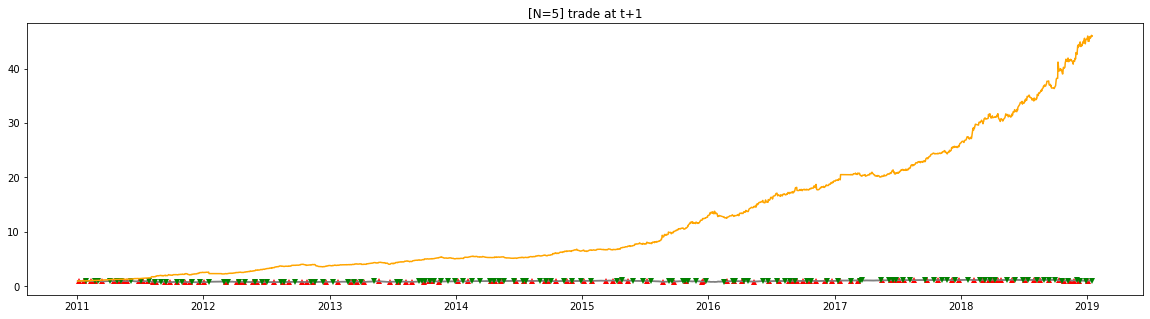

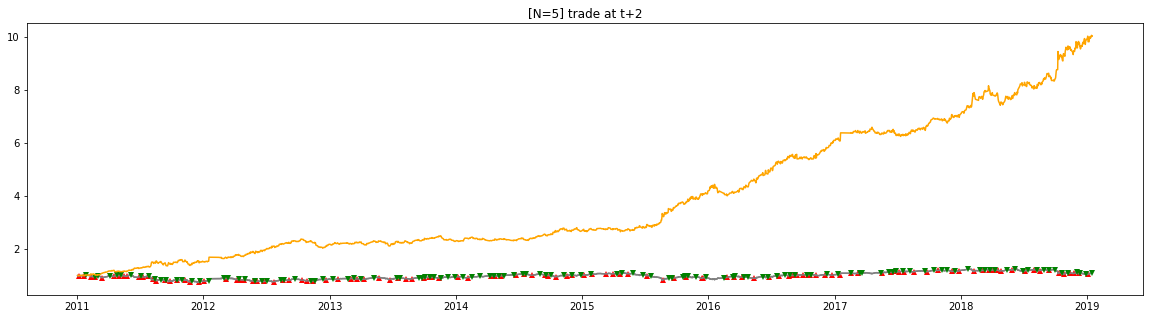

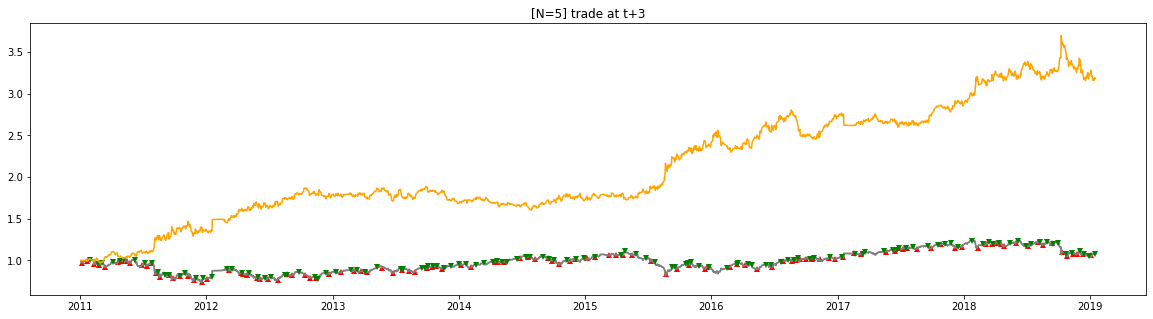

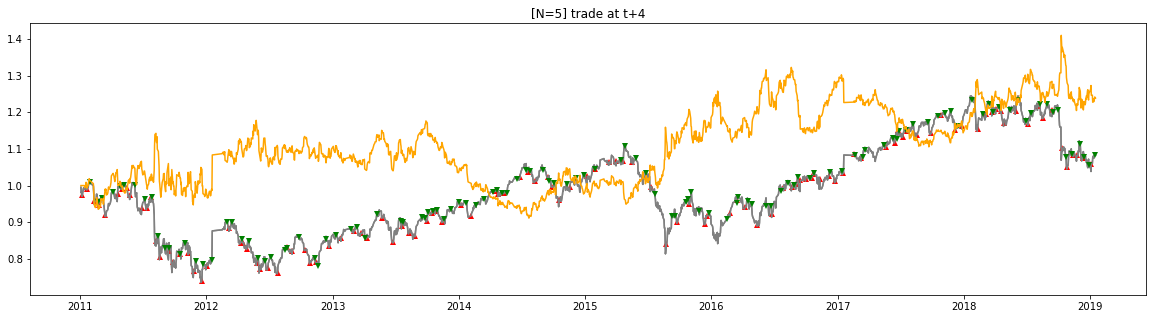

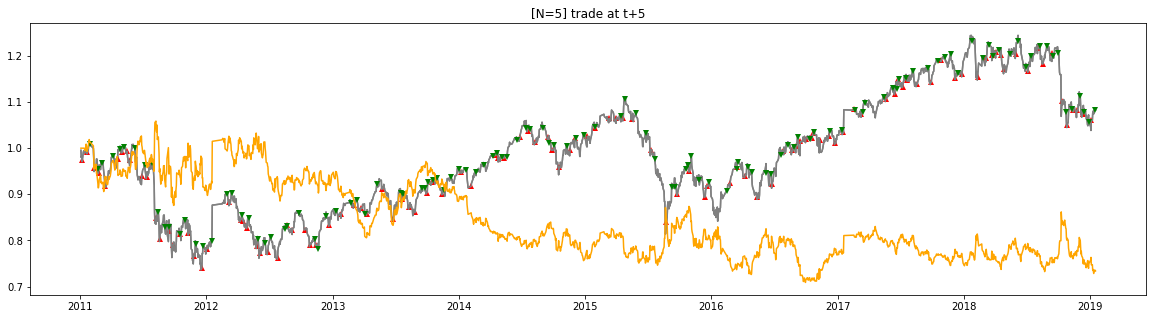

In [8]:
yvar = 'is_turnpt'
N = 5
print(f'N={N}')
df_TP = get_df_TP(N)
nav_last = []
shifts = range(-N, N+1)
for shift in shifts:
    signal = get_signal_shift(df_TP, yvar, shift)
    nav = get_nav(df_TP.close, df_TP.is_turnpt, df_TP.index, signal, f'[N={N}] trade at t+{shift}')
    nav_last.append(nav[-1])
pd.Series(dict(zip(shifts, nav_last))).to_frame().T.round(2)

# signal

In [9]:
N = 5
n_test = 483
df_TP = dict_df_TP[N].tail(483)
df_TP.head()

,N,close,day_to_maturity,high,is_turnpt,is_turnpt_downward,is_turnpt_upward,low,maturity,open,vol,next_dt_turnpt,prc_diff,duration,slope
tx_datetime,,,,,,,,,,,,,,,
2017-01-12,5,9410.0,-6,9433.0,-1.0,1.0,0.0,9350.0,2017-01-18,9353.0,225618.0,2017-01-13,-36.0,1,-36.000000
2017-01-13,5,9374.0,-5,9397.0,0.0,0.0,0.0,9361.0,2017-01-18,9388.0,157754.0,2017-01-16,-88.0,3,-29.333333
2017-01-16,5,9286.0,-2,9362.0,1.0,0.0,1.0,9274.0,2017-01-18,9360.0,224124.0,2017-01-17,55.0,1,55.000000
2017-01-17,5,9341.0,-1,9344.0,0.0,0.0,0.0,9280.0,2017-01-18,9282.0,147866.0,2017-01-18,-23.0,1,-23.000000
2017-01-18,5,9318.0,0,9349.0,0.0,0.0,0.0,9311.0,2017-01-18,9336.0,120832.0,2017-01-18,0.0,0,0.000000


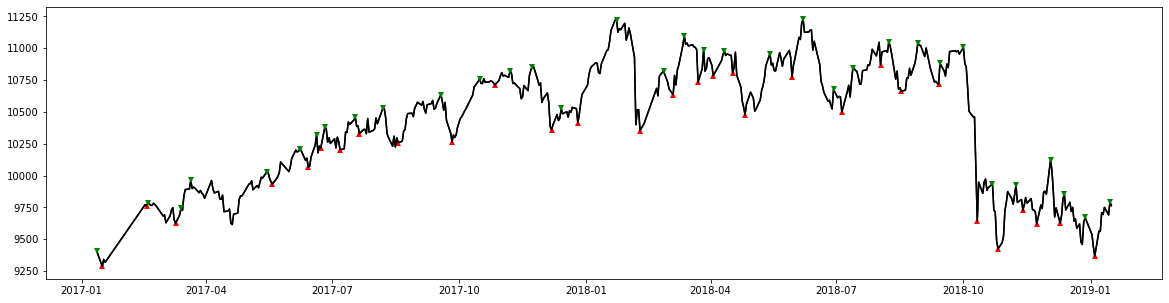

In [10]:
def plot_turnpt(price, turnpts, dates_index):
    index_upward = np.where(turnpts==1)[0]
    index_downward = np.where(turnpts==-1)[0]
    
    plt.figure(figsize=(20, 5))
    plt.plot(dates_index, price, color='black', markevery=index_upward.tolist(), marker='^', markerfacecolor='red', markeredgewidth=0.0)
    plt.plot(dates_index, price, color='black', markevery=index_downward.tolist(), marker='v', markerfacecolor='green', markeredgewidth=0.0)


price = df_TP.close.values
turnpts_true = df_TP.is_turnpt.values
dates_index = df_TP.index
plot_turnpt(price, turnpts_true, dates_index)

transformed OHLCV at frequency 1D
reading cache of TXF in 1D OHLCV


/home/cyyen/miniconda3/envs/stock_path_tracker/lib/python3.8/site-packages/pandas/core/groupby/groupby.py:980: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  result = concat(values, axis=self.axis, keys=keys)


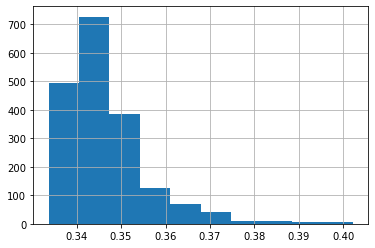

transformed OHLCV at frequency 1D
reading cache of TXF in 1D OHLCV


Text(0.5, 1.0, 'raw')

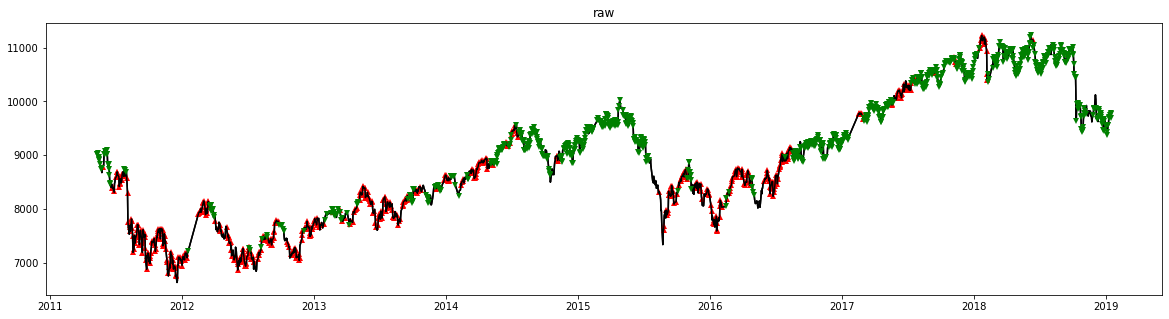

Text(0.5, 1.0, 'confirmed by t+1')

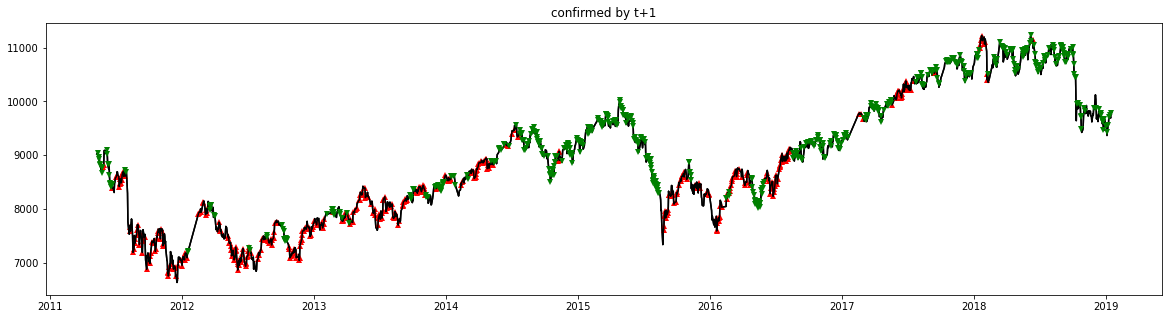

In [93]:
from model import get_model_path, load_model, get_train_test_pools, get_train_test_pools_with_index
def get_predict_class(model, pool, threshold = 0):
    max_prob = model.predict_proba(pool).max(axis=1)
    turnpts_pred = model.predict(pool).flatten()
    turnpts_pred_filtered = np.where(max_prob>=threshold, turnpts_pred, 0)
    return turnpts_pred_filtered

N=5
DIRECTION='is_turnpt'
WEIGHTS_QUNATILE = 0.01
threshold = 0.34

model = load_model(get_model_path(N, DIRECTION))
train_pool, test_pool, train_dates, test_dates =  get_train_test_pools_with_index(N,DIRECTION, WEIGHTS_QUNATILE, CACHE=True)

max_prob = model.predict_proba(test_pool).max(axis=1)
pd.Series(max_prob).hist()
plt.show()

df_pred = (
    pd.DataFrame(get_predict_class(model, test_pool, threshold), columns=['pred']).
    assign(y=test_pool.get_label()).
    set_index(test_dates).loc[:, ['y', 'pred']]
)

# add price
from turnpt_analysis import get_df_turnpt_measures
df_y = get_df_turnpt_measures(N).fillna(0)

df_signal = (
    df_pred.join(df_y.set_index('tx_datetime').loc[:, ['close']]).
    assign(close_t1 = lambda x: x.close.shift(-1), pred_confirmed = np.nan).
    assign(pred_confirmed = lambda x: np.where(x.pred == -1,  np.where(x.close > x.close_t1, -1, 0), x.pred_confirmed)).
    assign(pred_confirmed = lambda x: np.where(x.pred == 1,  np.where(x.close < x.close_t1, 1, 0), x.pred_confirmed)).
    assign(pred_confirmed = lambda x: x.pred_confirmed.fillna(method='pad')).
    assign(signal = lambda x: x.pred_confirmed.shift(1).fillna(0))
)


price = df_signal.close.values
dates_index = df_signal.index
plot_turnpt(price, df_signal.pred, dates_index)
plt.title('raw')
plt.show()

plot_turnpt(price, df_signal.pred_confirmed, dates_index)
plt.title('confirmed by t+1')
plt.show()

In [94]:
df_signal.pred.abs().sum(), df_signal.pred_confirmed.abs().sum()

(1481.0, 969.0)

In [100]:
df_signal.close.loc[df_signal.index[3]]

8922.0

In [128]:
df = (
    df_signal.query('pred_confirmed !=0').
    loc[:, ['pred_confirmed']].
    assign(entry = lambda x: x.index, exit = lambda x: x.entry.shift(-1)).dropna()
)
df['p_entry'] = df_signal.loc[df.entry.values].close.values
df['p_exit'] = df_signal.loc[df.exit.values].close.values
df['ret'] = df.p_exit.div(df.p_entry) - 1
df

,pred_confirmed,entry,exit,p_entry,p_exit,ret
tx_datetime,,,,,,
2011-05-13,-1.0,2011-05-13,2011-05-16,9034.0,8922.0,-0.012398
2011-05-16,-1.0,2011-05-16,2011-05-18,8922.0,8963.0,0.004595
2011-05-18,-1.0,2011-05-18,2011-05-19,8963.0,8840.0,-0.013723
2011-05-19,-1.0,2011-05-19,2011-05-20,8840.0,8817.0,-0.002602
2011-05-20,-1.0,2011-05-20,2011-05-24,8817.0,8762.0,-0.006238
...,...,...,...,...,...,...
2019-01-02,-1.0,2019-01-02,2019-01-03,9536.0,9440.0,-0.010067
2019-01-03,-1.0,2019-01-03,2019-01-07,9440.0,9563.0,0.013030
2019-01-07,-1.0,2019-01-07,2019-01-09,9563.0,9708.0,0.015163


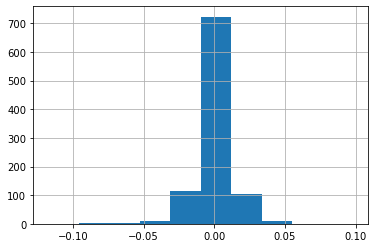

In [130]:
df.ret.hist()